<a href="https://colab.research.google.com/github/daishek/bigdata-univ/blob/main/TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
path = "automobileEDA.csv"

df = pd.read_csv(path)

df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
# Q3

df['peak-rpm'].dtypes # => float64

# la coleration entre peak-rpm et price
df[['peak-rpm', 'price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [4]:
# Q4 - correlaton
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


<Axes: xlabel='engine-size', ylabel='price'>

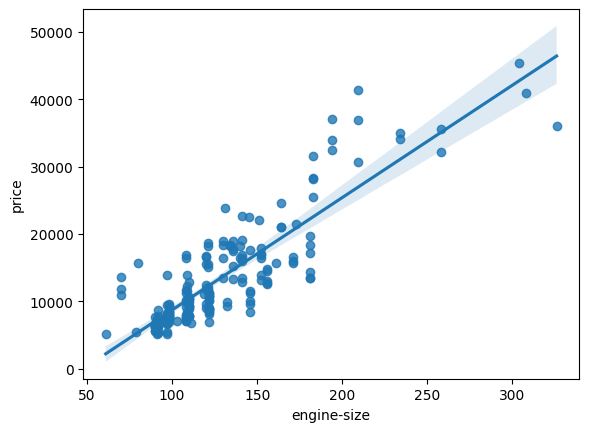

In [5]:
# Q5 - is "engine-size" predective using regplot
sns.regplot(x= "engine-size", y="price", data=df)

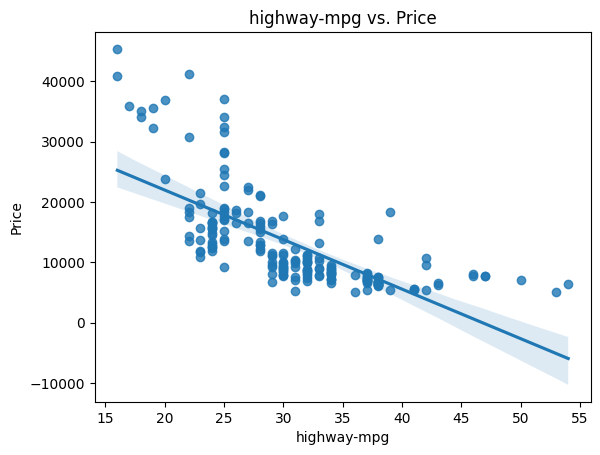

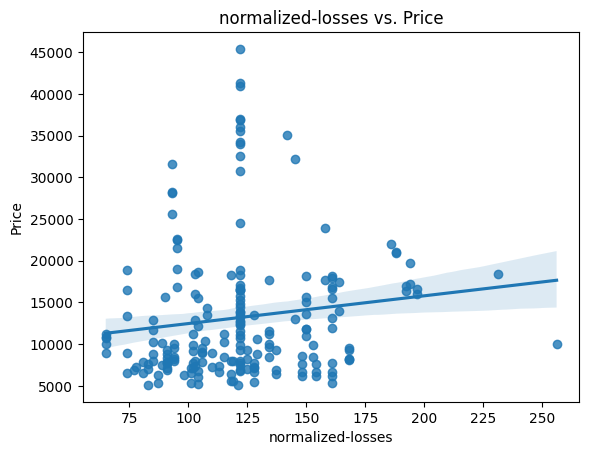

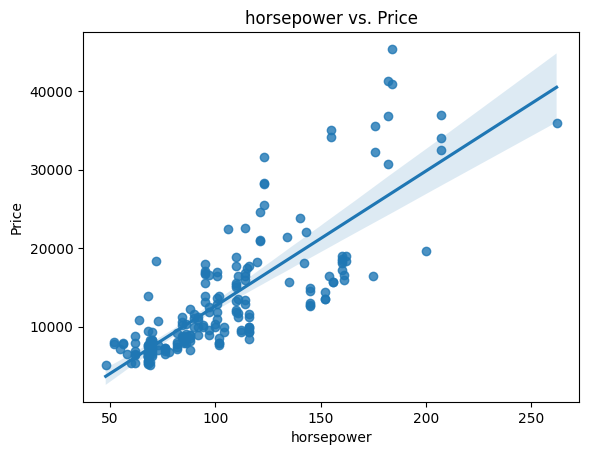

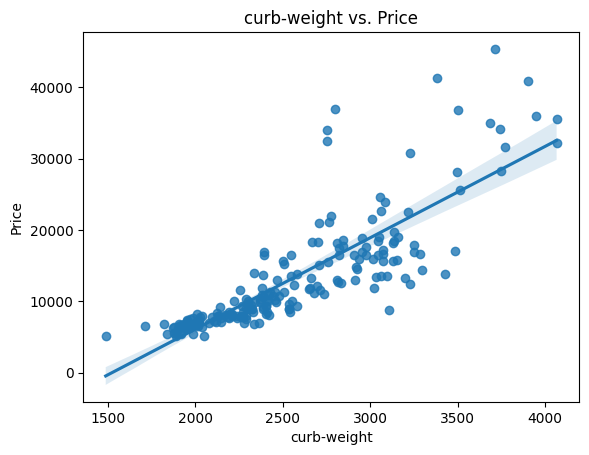

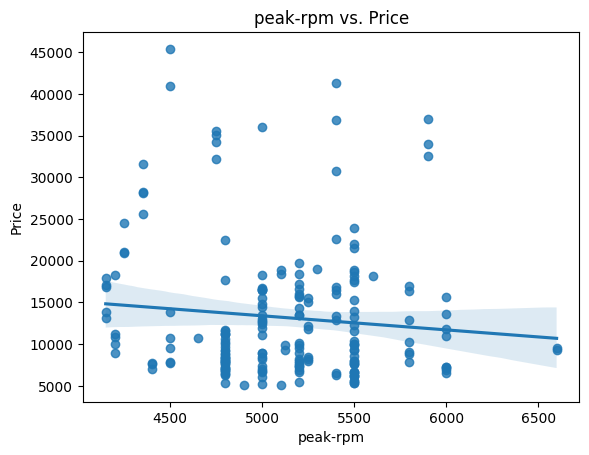

In [6]:
# Q6
columns_to_verify = ["highway-mpg", "normalized-losses", "horsepower", "curb-weight", "peak-rpm"]

for column in columns_to_verify:
  sns.regplot(x= column, y="price", data=df)
  plt.xlabel(column)
  plt.ylabel("Price")
  plt.title(f"{column} vs. Price")
  plt.show()

correlation:  0.08230982738970488


<Axes: xlabel='stroke', ylabel='price'>

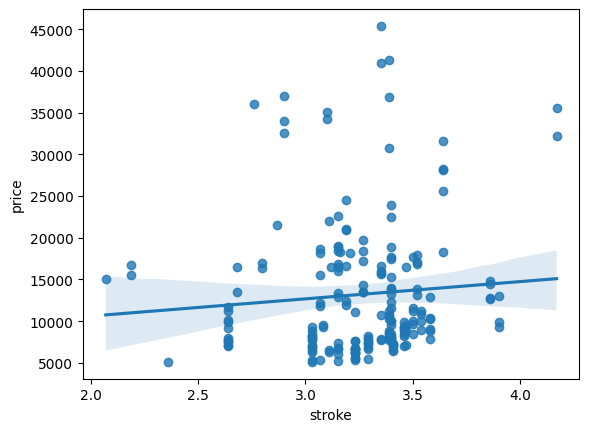

In [7]:
# Q7
print("correlation: ", df['stroke'].corr(df['price']))
sns.regplot(x= "stroke", y="price", data=df)

correlation: body-style .vs price: 0.08230982738970488


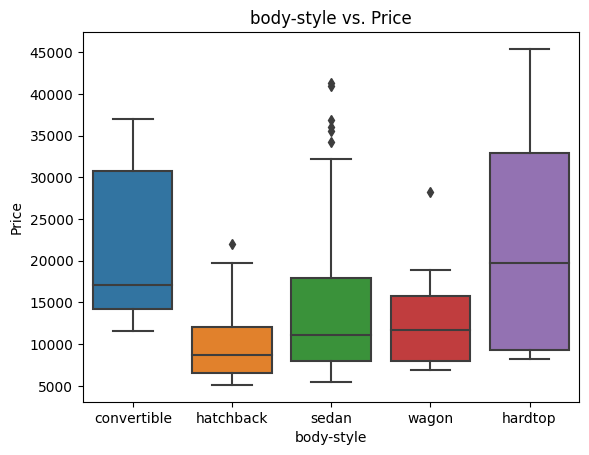

correlation: engine-location .vs price: 0.08230982738970488


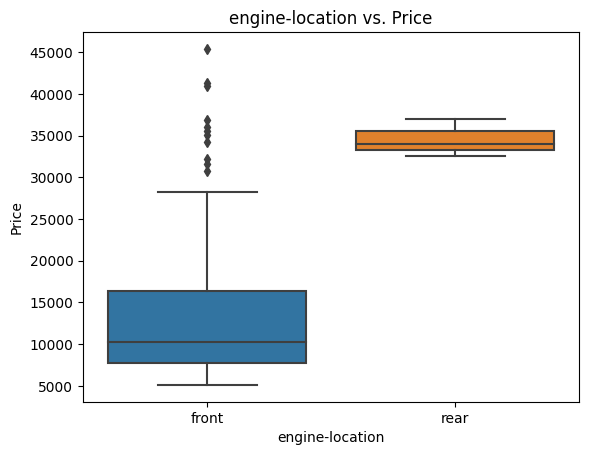

correlation: drive-wheels .vs price: 0.08230982738970488


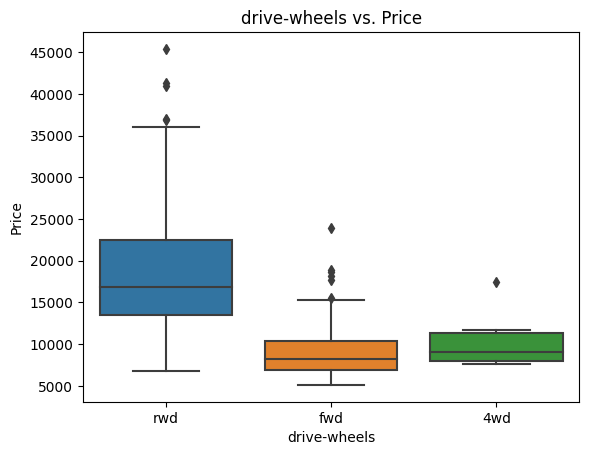

In [8]:
# Q8
columns_to_verify2 = ["body-style", "engine-location", "drive-wheels"]

for column in columns_to_verify2:
  print(f"correlation: {column} .vs price: {df['stroke'].corr(df['price'])}")
  # sns.regplot(x= column, y="price", data=df)  !not working!

  sns.boxplot(x= column, y="price", data=df)
  plt.xlabel(column)
  plt.ylabel("Price")
  plt.title(f"{column} vs. Price")
  plt.show()


In [9]:
# Q9
drive_wheels_count = df['drive-wheels'].value_counts().to_frame()

engine_location_count = df['engine-location'].value_counts().to_frame()


drive_wheels_count
engine_location_count

,engine-location
front,198
rear,3


In [16]:
# Q10 trouver le "price" moyen basé sur 'drivewheels' et 'body-style'.
# we can do ->
# prix_moyen = df.groupby(["drive-wheels", "body-style"])['price'].mean()
# or ->
df_test = df[["drive-wheels", "body-style", "price"]]
prix_moyen = df_test.groupby(["drive-wheels", "body-style"], as_index=False).mean()

prix_moyen

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [19]:
# Q11
df_pivot = prix_moyen.pivot(index="drive-wheels", columns="body-style")
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

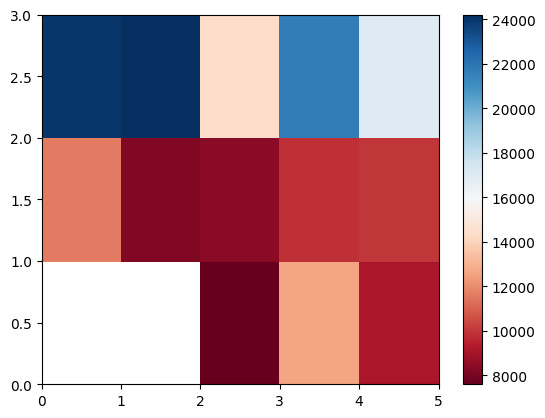

In [25]:
# Q12
plt.pcolor(df_pivot, cmap="RdBu")
plt.colorbar()
plt.show()

In [27]:
# Q13
variable_pairs = [('wheel-base', 'price'),
                  ('horsepower', 'price'),
                  ('length', 'price'),
                  ('width', 'price'),
                  ('curb-weight', 'price'),
                  ('engine-size', 'price'),
                  ('bore', 'price'),
                  ('city-L/100km', 'price'),
                  ('highway-mpg', 'price')]

for pair in variable_pairs:
    correlation, p_value = stats.pearsonr(df[pair[0]], df[pair[1]])
    print(f"Corrélation entre {pair[0]} et {pair[1]} : {correlation:.4f}")
    print(f"P-value : {p_value:.4f}")
    print("-" * 10)


# grande relation positive pour tous sauf "highway-mpg" qui est grande relation négative
# P-value -> forte certitude dans le résultat

Corrélation entre wheel-base et price : 0.5846
P-value : 0.0000
----------
Corrélation entre horsepower et price : 0.8096
P-value : 0.0000
----------
Corrélation entre length et price : 0.6906
P-value : 0.0000
----------
Corrélation entre width et price : 0.7513
P-value : 0.0000
----------
Corrélation entre curb-weight et price : 0.8344
P-value : 0.0000
----------
Corrélation entre engine-size et price : 0.8723
P-value : 0.0000
----------
Corrélation entre bore et price : 0.5432
P-value : 0.0000
----------
Corrélation entre city-L/100km et price : 0.7899
P-value : 0.0000
----------
Corrélation entre highway-mpg et price : -0.7047
P-value : 0.0000
----------
